# Function Optimization using local search

### Sphere Function

The Sphere function is defined as:

$f(x) = \sum_{i=1}^{n} x_i^2$

where $ x = (x_1, x_2, \dots, x_n) $ is a vector of $n$ variables. In the 2-dimensional case, this simplifies to:

$f(x) = x_1^2 + x_2^2$

### Rastrigin Function

The Rastrigin function is defined as:

$f(x) = A \cdot n + \sum_{i=1}^{n} \left( x_i^2 - A \cdot \cos(2\pi x_i) \right)$

where:
- $A = 10$ is a constant,
- $ x = (x_1, x_2, \dots, x_n) $ is a vector of $n$ variables.

In the 2-dimensional case, this becomes:

$f(x) = 20 + x_1^2 - 10 \cdot \cos(2\pi x_1) + x_2^2 - 10 \cdot \cos(2\pi x_2)$

## Visualize Sphere and Rastrigin funciton

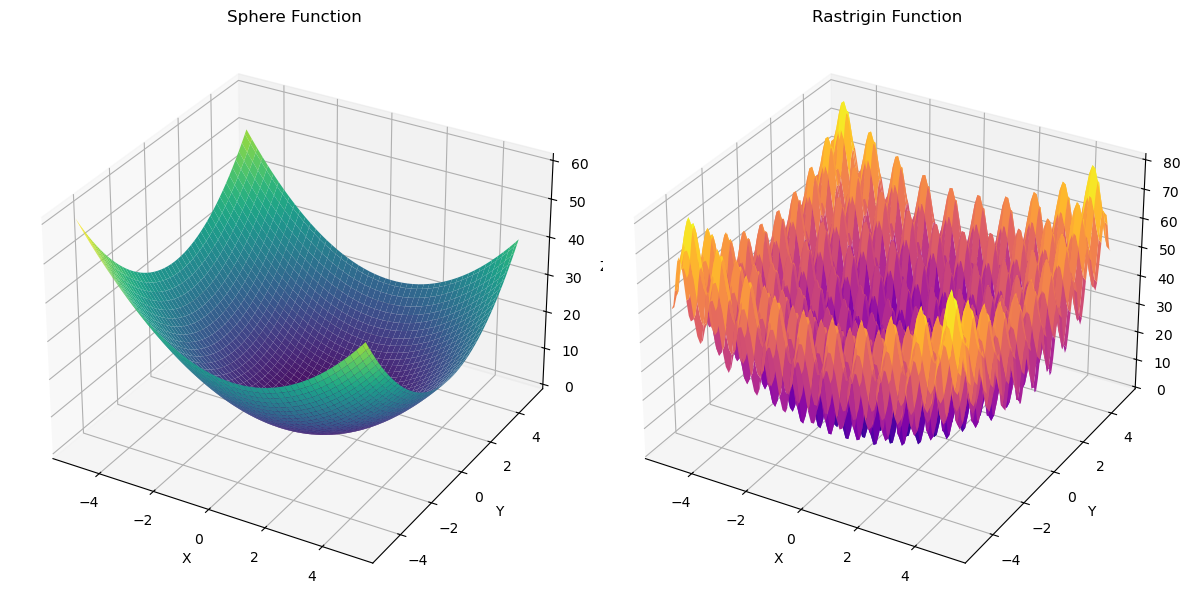

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.problems.single import Sphere, Rastrigin

sphere = Sphere(n_var=2)  # Ensure 2D input

rastrigin = Rastrigin(n_var=2)  # Ensure 2D input


# Create a grid of points for visualization
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z_sphere = np.array([[sphere.evaluate(np.array([xi, yi]))[0] for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
Z_rastrigin = np.array([[rastrigin.evaluate(np.array([xi, yi]))[0] for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

# Create 3D plots for both functions
fig = plt.figure(figsize=(12, 6))

# Sphere plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_sphere, cmap='viridis')
ax1.set_title('Sphere Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Rastrigin plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_rastrigin, cmap='plasma')
ax2.set_title('Rastrigin Function')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

## Finding minimum value using local search

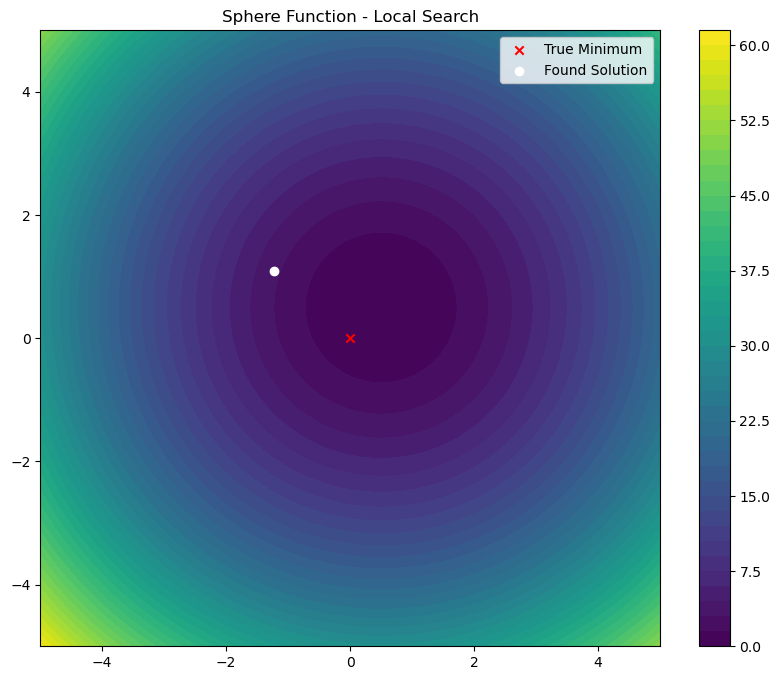

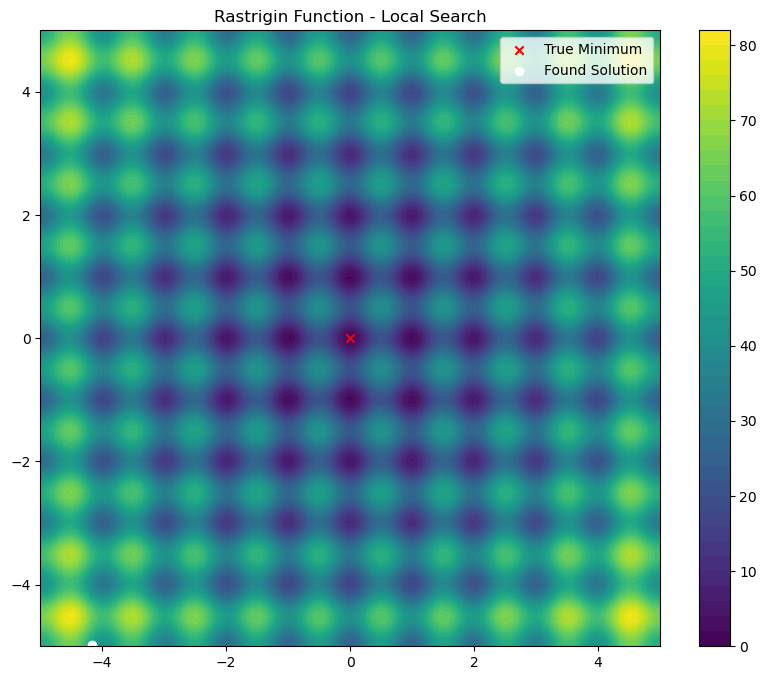

In [4]:
# Define the local search algorithm
def local_search(problem, x_init, step_size=0.1, max_iter=50):
    x = x_init.copy()
    best_x = x.copy()
    best_f = problem.evaluate(x).flatten()[0]  # Extract scalar

    for _ in range(max_iter):
        # Generate a neighboring solution by adding a small random perturbation
        x_new = x + np.random.uniform(-step_size, step_size, size=x.shape)
        f_new = problem.evaluate(x_new).flatten()[0]  # Extract scalar

        # If the new solution is better, replace the old one
        if f_new < best_f:
            best_x, best_f = x_new, f_new

    return best_x, best_f

# Define a function to plot the function and the found solution
def plot_function(problem, best_x, best_f, true_min, bounds, title):
    X, Y = np.meshgrid(np.linspace(bounds[0], bounds[1], 100),
                        np.linspace(bounds[0], bounds[1], 100))
    
    Z = np.zeros_like(X)  # Initialize Z as a 2D array
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = problem.evaluate(np.array([X[i, j], Y[i, j]])).flatten()[0]  # Extract scalar
    
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar()
    plt.scatter(true_min[0], true_min[1], color='red', marker='x', label='True Minimum')
    plt.scatter(best_x[0], best_x[1], color='white', marker='o', label='Found Solution')
    plt.title(title)
    plt.legend()
    plt.show()

# Apply the local search to the Sphere function (unimodal)
x_init = np.random.uniform(-5, 5, 2)
best_x_sphere, best_f_sphere = local_search(sphere, x_init)
plot_function(sphere, best_x_sphere, best_f_sphere, [0, 0], [-5, 5], "Sphere Function - Local Search")

# Apply the local search to the Rastrigin function (multimodal)
x_init = np.random.uniform(-5, 5, 2)
best_x_rastrigin, best_f_rastrigin = local_search(rastrigin, x_init)
plot_function(rastrigin, best_x_rastrigin, best_f_rastrigin, [0, 0], [-5, 5], "Rastrigin Function - Local Search")